# Assignment 6: Apply NB

<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li></li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
        </ul>
    </li>
    <li>
fine the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes Model </h1>

## 1.1 Loading Data

In [2]:
import pandas
data = pandas.read_csv(r"D:\Applied AI\Datasets and DB\Assignment 8 Naive Bayes- Donor Choose\preprocessed_data.csv")
data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [3]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
from sklearn.model_selection import train_test_split
y = data['project_is_approved']
x = data.drop(columns = 'project_is_approved')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, stratify = y)
x_train,x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size = 0.33, stratify = y_train)

print(x_train.shape, y_train.shape)
print(x_cv.shape, y_cv.shape)
print(x_test.shape, y_test.shape)

(49041, 8) (49041,)
(24155, 8) (24155,)
(36052, 8) (36052,)


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [4]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
    
from sklearn.feature_extraction.text import CountVectorizer

cvect_essay = CountVectorizer()
cvect_essay.fit(x_train['essay'].values)
x_train_essay_bow = cvect_essay.transform(x_train['essay'].values)
x_cv_essay_bow = cvect_essay.transform(x_cv['essay'].values)
x_test_essay_bow = cvect_essay.transform(x_test['essay'].values) 


In [5]:
print(x_train_essay_bow.shape, y_train.shape)
print(x_cv_essay_bow.shape, y_cv.shape)
print(x_test_essay_bow.shape, y_test.shape)

(49041, 41363) (49041,)
(24155, 41363) (24155,)
(36052, 41363) (36052,)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [6]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
# column- 'school_state'
cvect_state = CountVectorizer()
cvect_state.fit(x_train['school_state'].values)
x_train_state_ohe = cvect_state.transform(x_train['school_state'].values)
x_cv_state_ohe = cvect_state.transform(x_cv['school_state'].values)
x_test_state_ohe = cvect_state.transform(x_test['school_state'].values)

print("column- 'school_state'")
print(x_train_state_ohe.shape, y_train.shape)
print(x_cv_state_ohe.shape, y_cv.shape)
print(x_test_state_ohe.shape, y_test.shape)
print("~"*70);print("\n")

# column- 'teacher_prefix'
cvect_Tpref = CountVectorizer()
cvect_Tpref.fit(x_train["teacher_prefix"].values)
x_train_Tpref_ohe = cvect_Tpref.transform(x_train['teacher_prefix'].values)
x_cv_Tpref_ohe = cvect_Tpref.transform(x_cv['teacher_prefix'].values)
x_test_Tpref_ohe = cvect_Tpref.transform(x_test['teacher_prefix'].values)

print("column- 'teacher_prefix'")
print(x_train_Tpref_ohe.shape, y_train.shape)
print(x_cv_Tpref_ohe.shape, y_cv.shape)
print(x_test_Tpref_ohe.shape, y_test.shape)
print("~"*70);print("\n")

# column- 'project_grade_category'
cvect_pgc = CountVectorizer()
cvect_pgc.fit(x_train['project_grade_category'].values)
x_train_pgc_ohe = cvect_pgc.transform(x_train['project_grade_category'].values)
x_cv_pgc_ohe = cvect_pgc.transform(x_cv['project_grade_category'].values)
x_test_pgc_ohe = cvect_pgc.transform(x_test['project_grade_category'].values)

print("column- 'project_grade_category'")
print(x_train_pgc_ohe.shape, y_train.shape)
print(x_cv_pgc_ohe.shape, y_cv.shape)
print(x_test_pgc_ohe.shape, y_test.shape)
print("~"*70);print("\n")

# column- 'clean_categories'
cvect_CleanCat = CountVectorizer()
cvect_CleanCat.fit(x_train['clean_categories'].values)
x_train_CleanCat_ohe = cvect_CleanCat.transform(x_train['clean_categories'].values)
x_cv_CleanCat_ohe = cvect_CleanCat.transform(x_cv['clean_categories'].values)
x_test_CleanCat_ohe = cvect_CleanCat.transform(x_test['clean_categories'].values)

print("column- 'clean_categories'")
print(x_train_CleanCat_ohe.shape, y_train.shape)
print(x_cv_CleanCat_ohe.shape, y_cv.shape)
print(x_test_CleanCat_ohe.shape, y_test.shape)
print("~"*70);print("\n")


# column- 'clean_subcategories'
cvect_CleanSubCat = CountVectorizer()
cvect_CleanSubCat.fit(x_train['clean_subcategories'].values)
x_train_CleanSubCat_ohe = cvect_CleanSubCat.transform(x_train['clean_subcategories'].values)
x_cv_CleanSubCat_ohe = cvect_CleanSubCat.transform(x_cv['clean_subcategories'].values)
x_test_CleanSubCat_ohe = cvect_CleanSubCat.transform(x_test['clean_subcategories'].values)

print("column- 'clean_subcategories'")
print(x_train_CleanSubCat_ohe.shape, y_train.shape)
print(x_cv_CleanSubCat_ohe.shape, y_cv.shape)
print(x_test_CleanSubCat_ohe.shape, y_test.shape)


column- 'school_state'
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


column- 'teacher_prefix'
(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


column- 'project_grade_category'
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


column- 'clean_categories'
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


column- 'clean_subcategories'
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)


In [7]:
from sklearn.preprocessing import Normalizer

# column- 'price'
norm = Normalizer()
norm.fit(x_train['price'].values.reshape(1, -1))
x_train_price_norm = norm.transform(x_train['price'].values.reshape(1, -1)).T
x_cv_price_norm = norm.transform(x_cv['price'].values.reshape(1,-1)).T
x_test_price_norm = norm.transform(x_test['price'].values.reshape(1,-1)).T

print(x_train_price_norm.shape, y_train.shape)
print(x_cv_price_norm.shape, y_cv.shape)
print(x_test_price_norm.shape, y_test.shape)
print("~"*70);print("\n")

# column- 'teacher_number_of_previously_posted_projects'
norm.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
x_train_tp3_norm = norm.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).T
x_cv_tp3_norm = norm.transform(x_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).T
x_test_tp3_norm = norm.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).T
print(x_train_tp3_norm.shape, y_train.shape)
print(x_cv_tp3_norm.shape, y_cv.shape)
print(x_test_tp3_norm.shape, y_test.shape)

(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [8]:
# concatenating all the features
from scipy.sparse import hstack

X_train = hstack((x_train_state_ohe, x_train_Tpref_ohe, x_train_pgc_ohe, x_train_tp3_norm, x_train_CleanCat_ohe, x_train_CleanSubCat_ohe, x_train_essay_bow, x_train_price_norm)).tocsr()

X_cv = hstack((x_cv_state_ohe, x_cv_Tpref_ohe, x_cv_pgc_ohe, x_cv_tp3_norm, x_cv_CleanCat_ohe, x_cv_CleanSubCat_ohe, x_cv_essay_bow, x_cv_price_norm)).tocsr()

X_test = hstack((x_test_state_ohe, x_test_Tpref_ohe, x_test_pgc_ohe, x_test_tp3_norm, x_test_CleanCat_ohe, x_test_CleanSubCat_ohe, x_test_essay_bow, x_test_price_norm)).tocsr()


print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

(49041, 41464) (49041,)
(24155, 41464) (24155,)
(36052, 41464) (36052,)


In [9]:
x_train_tp3_norm[0].shape

(1,)

<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [10]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

train_auc = []
cv_auc = []
hyperparam = {'alpha': [0.01, 0.2,0.3, 0.5, 0.57, 0.66, 0.8, 0.88, 0.9]}
gscv = GridSearchCV(estimator = MultinomialNB(), param_grid = hyperparam, scoring = 'roc_auc', n_jobs = -1, cv = 3, return_train_score= True)
gscv.fit(X_train, y_train)
print("Best Hyperparameter: ",gscv.best_params_)
print("Score of Train Data:", gscv.best_score_)



Best Hyperparameter:  {'alpha': 0.3}
Score of Train Data: 0.6966666884204291


In [11]:
gscv.cv_results_

{'mean_fit_time': array([0.53002159, 0.46695956, 0.44704811, 0.47346958, 0.49331919,
        0.53041911, 0.47075701, 0.44798231, 0.29268471]),
 'std_fit_time': array([0.08796377, 0.0818922 , 0.00753784, 0.09342904, 0.05252031,
        0.02268004, 0.0417244 , 0.03280649, 0.02840842]),
 'mean_score_time': array([0.09142288, 0.08073481, 0.07695659, 0.08785041, 0.07775291,
        0.06544868, 0.06495833, 0.06051389, 0.02797445]),
 'std_score_time': array([0.01514791, 0.02500018, 0.00634309, 0.01618311, 0.01401725,
        0.00607512, 0.01017796, 0.00205576, 0.00523751]),
 'param_alpha': masked_array(data=[0.01, 0.2, 0.3, 0.5, 0.57, 0.66, 0.8, 0.88, 0.9],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.01},
  {'alpha': 0.2},
  {'alpha': 0.3},
  {'alpha': 0.5},
  {'alpha': 0.57},
  {'alpha': 0.66},
  {'alpha': 0.8},
  {'alpha': 0.88},
  {'alpha': 0.9}],
 'split0

In [12]:
import numpy as np
train_auc = gscv.cv_results_['mean_train_score']
test_auc = gscv.cv_results_['mean_test_score']
params = list(gscv.cv_results_['param_alpha'])

print(train_auc)
print(test_auc)
sorted(params)

[0.92886186 0.88843593 0.87757687 0.86075103 0.85582104 0.8499838
 0.84182994 0.83760363 0.83658454]
[0.67494309 0.69610179 0.69666669 0.69589331 0.69539465 0.69469931
 0.69353197 0.69286673 0.69269561]


[0.01, 0.2, 0.3, 0.5, 0.57, 0.66, 0.8, 0.88, 0.9]

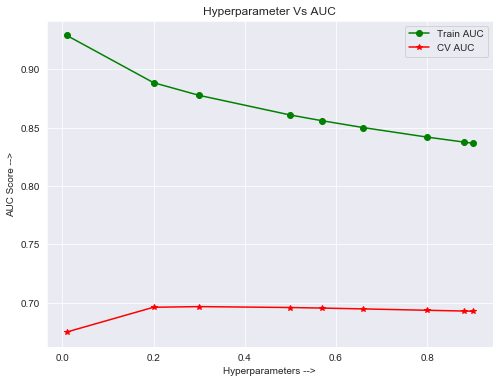

In [18]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize= (8, 6))
sb.set_style('darkgrid')
plt.plot(params, train_auc, "og-", label = 'Train AUC')
plt.xlabel("Hyperparameters -->")
plt.plot(params, test_auc, "*r-", label = 'CV AUC')
plt.ylabel("AUC Score -->")
plt.title("Hyperparameter Vs AUC")
plt.legend()
plt.show()


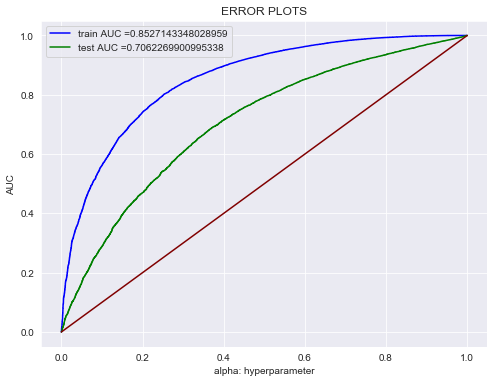

In [14]:
best_alpha = gscv.best_params_['alpha']
from sklearn.metrics import roc_curve, auc

NBclf = MultinomialNB(alpha= best_alpha)
NBclf.fit(X_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

#print(X_train.shape)
y_train_pred = NBclf.predict_proba(X_train)
y_test_pred = NBclf.predict_proba(X_test)


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

#print(y_test.shape, y_test_pred.shape)
plt.figure(figsize= (8, 6))
sb.set_style("darkgrid")
plt.plot(train_fpr, train_tpr, "b-",label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, 'g-',label="test AUC ="+str(auc(test_fpr, test_tpr)))
liner = sorted([round(np.random.random_sample(), 2) for i in range(10)])
liner.append(1)
liner.insert(0, 0)
#print(liner)
plt.plot(liner, liner, 'maroon')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [15]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [16]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(NBclf.predict(X_train), best_t)))

the maximum value of tpr*(1-fpr) 0.5990285082508505 for threshold 0.809
Train confusion matrix
[[ 4892  2534]
 [ 5594 36021]]


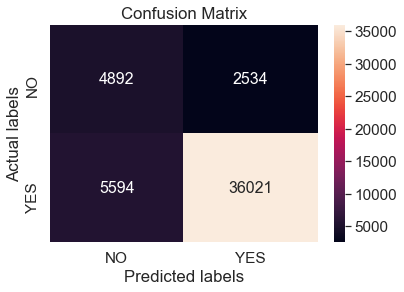

In [19]:
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
import pandas as pd
confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(NBclf.predict(X_train), best_t)), range(2),range(2))
sb.set(font_scale=1.4)#for label size
ax=plt.subplot()
sb.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g',ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['NO', 'YES']); ax.yaxis.set_ticklabels(['NO', 'YES']);

<b>Observation: </b>
In case of Training dataset -
* True Positives (= 35765) results are large compared to True Negative (= 4886) results

* False Negative (= 5850) are large compared to False Positive (= 2540)

In [21]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(NBclf.predict(X_test), best_t)))

Test confusion matrix
[[ 2336  3123]
 [ 5027 25566]]


Confusion Matrix- Test Data


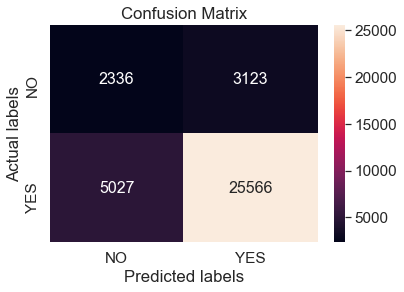

In [22]:
print("Confusion Matrix- Test Data")
confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(NBclf.predict(X_test), best_t)), range(2),range(2))
sb.set(font_scale=1.4)#for label size
ax=plt.subplot()
sb.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['NO', 'YES']); ax.yaxis.set_ticklabels(['NO', 'YES']);

<b>Observation: </b>
In case of Test dataset -
* True Positives (= 25375) results are large compared to True Negative (= 2322) results

* False Negative (= 5218) are large compared to False Positive (= 3137)

## with TFIDF ...

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvect = TfidfVectorizer()
tfidfvect.fit(x_train['essay'].values)
x_train_essay_tfidf = tfidfvect.transform(x_train['essay'].values)
x_cv_essay_tfidf = tfidfvect.transform(x_cv['essay'].values)
x_test_essay_tfidf = tfidfvect.transform(x_test['essay'].values)



In [24]:
X_train_set2 = hstack((x_train_state_ohe, x_train_Tpref_ohe, x_train_pgc_ohe, x_train_tp3_norm, x_train_CleanCat_ohe, x_train_CleanSubCat_ohe, x_train_essay_tfidf, x_train_price_norm)).tocsr()

X_cv_set2 = hstack((x_cv_state_ohe, x_cv_Tpref_ohe, x_cv_pgc_ohe, x_cv_tp3_norm, x_cv_CleanCat_ohe, x_cv_CleanSubCat_ohe, x_cv_essay_tfidf, x_cv_price_norm)).tocsr()

X_test_set2 = hstack((x_test_state_ohe, x_test_Tpref_ohe, x_test_pgc_ohe, x_test_tp3_norm, x_test_CleanCat_ohe, x_test_CleanSubCat_ohe, x_test_essay_tfidf, x_test_price_norm)).tocsr()


print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

(49041, 41464) (49041,)
(24155, 41464) (24155,)
(36052, 41464) (36052,)


In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
import numpy as np
hp = list(np.random.random_sample(10))
print(hp)
hyperparam = {'alpha': hp}
rcv = RandomizedSearchCV(estimator = MultinomialNB(), param_distributions = hyperparam, scoring = 'roc_auc', n_jobs = -1, cv = 10, return_train_score= True)
rcv.fit(X_train, y_train)
print("Best Hyperparameter: ",rcv.best_params_)
print("Score of Train Data:", rcv.best_score_)



[0.20030044468075026, 0.920124696550332, 0.3831973015977542, 0.8862433668318692, 0.665361239243955, 0.1553832842110966, 0.5275296028514908, 0.017214142063063487, 0.024575064608889696, 0.1934799107293408]
Best Hyperparameter:  {'alpha': 0.20030044468075026}
Score of Train Data: 0.7008620807464145


In [36]:
#rcv.cv_results_

In [27]:
arg_srt = np.argsort(rcv.cv_results_['param_alpha'])

train_auc_set2 = [rcv.cv_results_['mean_train_score'][i] for i in arg_srt]
test_auc_set2 = [rcv.cv_results_['mean_test_score'][i] for i in arg_srt]
params = sorted(rcv.cv_results_['param_alpha'])

print(train_auc_set2)
print(train_auc_set2)
sorted(params)



[0.906465313441353, 0.9030085169881282, 0.8751220314092485, 0.8702111669466923, 0.8693949001047361, 0.8518365380182743, 0.8414672507146032, 0.8332025623105318, 0.8221896767749086, 0.8206840708850646]
[0.906465313441353, 0.9030085169881282, 0.8751220314092485, 0.8702111669466923, 0.8693949001047361, 0.8518365380182743, 0.8414672507146032, 0.8332025623105318, 0.8221896767749086, 0.8206840708850646]


[0.017214142063063487,
 0.024575064608889696,
 0.1553832842110966,
 0.1934799107293408,
 0.20030044468075026,
 0.3831973015977542,
 0.5275296028514908,
 0.665361239243955,
 0.8862433668318692,
 0.920124696550332]

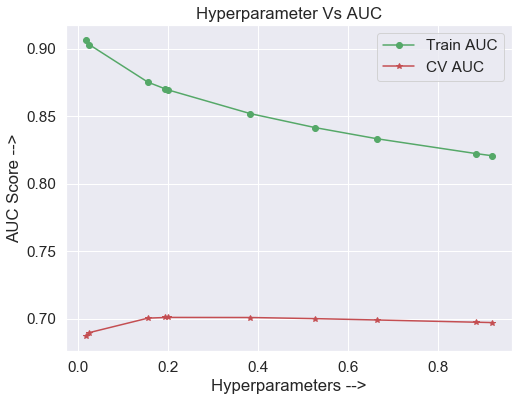


Best α (alpha):  0.20030044468075026


In [39]:
plt.figure(figsize= (8, 6))
sb.set_style('darkgrid')
plt.plot(params, train_auc_set2, "og-", label = 'Train AUC')
plt.xlabel("Hyperparameters -->")
plt.plot(params, test_auc_set2, "*r-", label = 'CV AUC')
plt.ylabel("AUC Score -->")
plt.title("Hyperparameter Vs AUC")
plt.legend()
plt.show()

alpha_tfidf = rcv.best_params_['alpha']
print("\nBest α (alpha): ", alpha_tfidf)

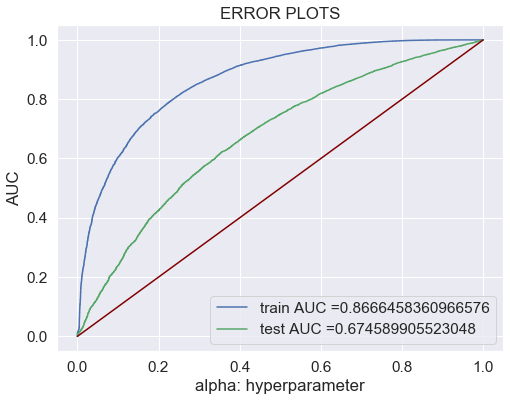

In [29]:

clfNB = MultinomialNB(alpha = Alpha)
clfNB.fit(X_train, y_train)
y_pred_train_set2 = clfNB.predict_proba(X_train_set2)
y_pred_test_set2 = clfNB.predict_proba(X_test_set2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_pred_train_set2[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred_test_set2[:,1])

#print(y_test.shape, y_test_pred.shape)
plt.figure(figsize= (8, 6))
sb.set_style("darkgrid")
plt.plot(train_fpr, train_tpr, "b-",label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, 'g-',label="test AUC ="+str(auc(test_fpr, test_tpr)))
liner = sorted([round(np.random.random_sample(), 2) for i in range(10)])
liner.append(1)
liner.insert(0, 0)
#print(liner)
plt.plot(liner, liner, 'maroon')
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [30]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(clfNB.predict(X_train_set2), best_t)))




the maximum value of tpr*(1-fpr) 0.6118348432638212 for threshold 0.813
Train confusion matrix
[[ 1381  6045]
 [   84 41531]]


Confusion Matrix- Train Data


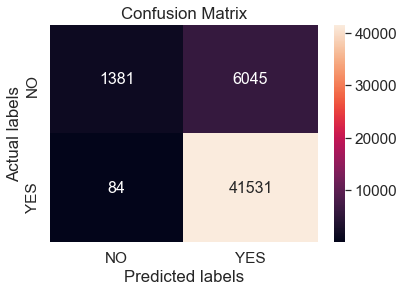

In [31]:
print("Confusion Matrix- Train Data")
confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(clfNB.predict(X_train_set2), best_t)), range(2),range(2))
sb.set(font_scale=1.4)#for label size
ax=plt.subplot()
sb.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['NO', 'YES']); ax.yaxis.set_ticklabels(['NO', 'YES']);

<b>Observation: </b>
In case of Training dataset -
* True Positives (= 41483) results are large compared to True Negative (= 1387) results

* False Negative (= 132) are large compared to False Positive (= 6039)

In [32]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(clfNB.predict(X_test_set2), best_t)))

Test confusion matrix
[[   97  5362]
 [  202 30391]]


Confusion Matrix- Test Data


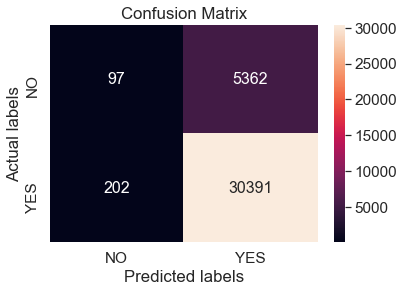

In [33]:
print("Confusion Matrix- Test Data")
confusion_matrix_df_train = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(clfNB.predict(X_test_set2), best_t)), range(2),range(2))
sb.set(font_scale=1.4)#for label size
ax=plt.subplot()
sb.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['NO', 'YES']); ax.yaxis.set_ticklabels(['NO', 'YES']);

<b>Observation: </b>
In case of Test dataset -
* True Positives (= 30349) results are large compared to True Negative (= 124) results

* False Negative (= 244) are large compared to False Positive (= 5335)

### getting the top 20 features!

In [34]:
features_column= []
objects = [cvect_essay, cvect_state, cvect_Tpref, cvect_pgc, cvect_CleanCat, cvect_CleanSubCat]

for obj in objects:
    for word in obj.get_feature_names():
        features_column.append(word)
    
#print(features_column)

#print(type(cvect_essay.get_feature_names()))

negclass_prob = NBclf.feature_log_prob_[0, :].argsort()
posclass_prob = NBclf.feature_log_prob_[1, :].argsort()
print(negclass_prob)
print(posclass_prob)
print('Top 10 features from class: 0')
print(np.take(features_column, negclass_prob[:20]))
print('-'*50)
print('Top 10 features from class: 1')
print(np.take(features_column, posclass_prob[:20]))

[12143 15788 15787 ... 21434 32395 35552]
[20731 29581  9137 ... 24649 32395 35552]
Top 10 features from class: 0
['educators' 'genuis' 'genuinely' 'genuine' 'genuenly' 'gents' 'gentry'
 'gentrifying' 'prosperity' 'genus' 'gentrification' 'gentlest'
 'gentlemen' 'prostheses' 'prosthetics' 'gente' 'genrefying' 'genre'
 'genotypes' 'gently']
--------------------------------------------------
Top 10 features from class: 1
['kit' 'quit' 'crawlers' 'avi' 'avialable' 'quietly' 'hwang' 'hybrids'
 'avidly' 'crate' 'hydrosphere' 'avoidant' 'avoided' 'questions'
 'hyperactive' 'vermicomposter' 'iba' 'typos' 'quarrels' 'qualitynannan']


In [41]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names=['vectorizer','model','Hyper-parameter','AUC']
x.add_row(["BOW",'MultinomialNB', best_alpha , round(gscv.best_score_,3)])
x.add_row(["TFIDF",'MultinomialNB', alpha_tfidf, round(rcv.best_score_,3)])
print(x)

+------------+---------------+---------------------+-------+
| vectorizer |     model     |   Hyper-parameter   |  AUC  |
+------------+---------------+---------------------+-------+
|    BOW     | MultinomialNB |         0.3         | 0.697 |
|   TFIDF    | MultinomialNB | 0.20030044468075026 | 0.701 |
+------------+---------------+---------------------+-------+
